In [1]:
import numpy as np 
import sys,pickle 
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm 

sys.path.append('../..')
from project.recoil import Electron as El, p50, norm, get_vdf_ert
from project.electron_pll import MLE
from project.electron_pll import StatisticalUncertanity as Stat 
from project.electron_pll import MassModelUncertanity as MassModel
from project.electron_pll import SampleUncertanity as Samp

import matplotlib
matplotlib.rcParams['font.family'] = 'sans'
matplotlib.rcParams['mathtext.fontset'] = 'dejavusans'

In [2]:
MWlike = pickle.load(open('../../Output/MWlike_dict.pkl','rb'))
mwld = MWlike['vdf_RCfit']
mwd = mwld['MW']
mwgals = MWlike['mwgals']

In [3]:
data = pickle.load(open('../../Output/El_rate_prediction.pkl', 'rb'))

In [4]:
el_init = El('Si', vE=mwd['vE'], vdfE=mwd['vdfE_50'], vesc=p50(mwd['vescs']), vcirc=p50(mwd['vcircs']), rhosun=p50(mwd['rhosuns']))
mdm0, sdm0, bl0 = 5., 1e-38, 1.
mock = el_init.mocksample(mdm0, sdm0, bl0, 3.8, exposure=1, seed=5222)
print (el_init.totNsg(mdm0, sdm0, exposure=1))

715.2236247411968


0it [00:00, ?it/s]

0it [00:00, ?it/s]

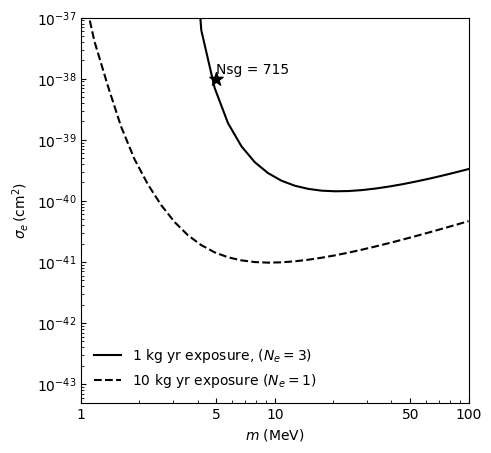

In [5]:
Mdm = np.logspace(0,2,30)
Sdm_1 = el_init.sdmMdmNsg(Mdm, exposure=1, Ne_thr=3)
Sdm_10 = el_init.sdmMdmNsg(Mdm, exposure=10)

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(Mdm, Sdm_1, c='k', ls='-', label='1 kg yr exposure, ($N_e = 3$)')
ax.plot(Mdm, Sdm_10, ls='--', c='k', label='10 kg yr exposure ($N_e = 1$)')
ax.legend(loc='lower left', frameon=False)

ax.scatter(mdm0, sdm0, c='k', marker='*', s=100)
ax.text(mdm0, sdm0*1.2, 'Nsg = %i'%el_init.totNsg(mdm0, sdm0))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1,100)
ax.set_ylim(5e-44,1e-37)
ax.set_xticks([1, 5, 10, 50, 100], [1, 5, 10, 50, 100])
ax.tick_params(which='both', direction='in')
ax.set_xlabel('$m$ (MeV)')
ax.set_ylabel('$\sigma_e\, (\mathrm{cm^{2}})$');

In [5]:
stat = Stat(mock, el_init=el_init, Mdm=np.linspace(3, 7, 100))
statlim = stat.get_limits(stat.Mdm)

In [6]:
Mdm = np.array(list(data['massmodel']['MW'][0].keys()))
mm = MassModel(mock, el_init=el_init, Mdm=Mdm, chainlen=50)
mmlim = mm.get_limits(mm.Mdm)

100%|██████████| 50/50 [00:00<00:00, 5547.58it/s]


In [8]:
Mdm = np.array(list(data['sample'][5].keys()))
Per = list(data['sample'].keys())
samp = Samp(mock, el_init=el_init, Mdm=Mdm, percentiles=Per)
samplim = samp.get_limits(samp.Mdm)

100%|██████████| 91/91 [00:00<00:00, 8152.11it/s]


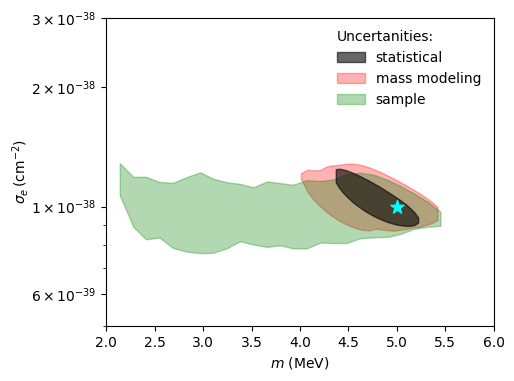

In [11]:
fig, ax = plt.subplots(figsize=(5,4))
ax.fill_between(*statlim, color='k', alpha=0.6, zorder=2, label='statistical')
ax.fill_between(*mmlim, color='r', alpha=0.3, zorder=1, label='mass modeling')
ax.fill_between(*samplim, color='g', alpha=0.3, zorder=1, label='sample')
ax.legend(frameon=False, title='Uncertanities:', alignment='left', loc='upper right')

ax.scatter(5., 1e-38, c='cyan', s=100, marker='*', zorder=3)
ax.set_yscale('log')
ax.set_xlim(2,6.0)
ax.set_ylim(5e-39, 3e-38)
ax.set_yticks([6e-39, 1e-38, 2e-38, 3e-38], [r'$6 \times 10^{-39}$', r'$1 \times 10^{-38}$', r'$2 \times 10^{-38}$', r'$3 \times 10^{-38}$'])
ax.set_xlabel('$m$ (MeV)')
ax.set_ylabel('$\sigma_e\, \mathrm{(cm^{-2})}$', labelpad=0)

plt.savefig('../../Output/figures/recoil/El_uncertanities.png', dpi=300, bbox_inches='tight')